In [1]:
import numpy as np
import matplotlib 
import pandas as pd

In [2]:
housing_data = pd.read_csv('/Users/saksham_diwan/Desktop/Housing.csv')
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
housing_data_filtered = housing_data.get(['price','area'])
housing_data_filtered 

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420
...,...,...
540,1820000,3000
541,1767150,2400
542,1750000,3620
543,1750000,2910


In [4]:
housing_unit_adjusted = housing_data_filtered.assign(price_in_mil=housing_data_filtered.get('price')/1000000)
housing_unit_adjusted = housing_unit_adjusted.assign(area_in_1000_sqft=housing_data_filtered.get('area')/1000)
housing_unit_adjusted

,price,area,price_in_mil,area_in_1000_sqft
0,13300000,7420,13.30000,7.42
1,12250000,8960,12.25000,8.96
2,12250000,9960,12.25000,9.96
3,12215000,7500,12.21500,7.50
4,11410000,7420,11.41000,7.42
...,...,...,...,...
540,1820000,3000,1.82000,3.00
541,1767150,2400,1.76715,2.40
542,1750000,3620,1.75000,3.62
543,1750000,2910,1.75000,2.91


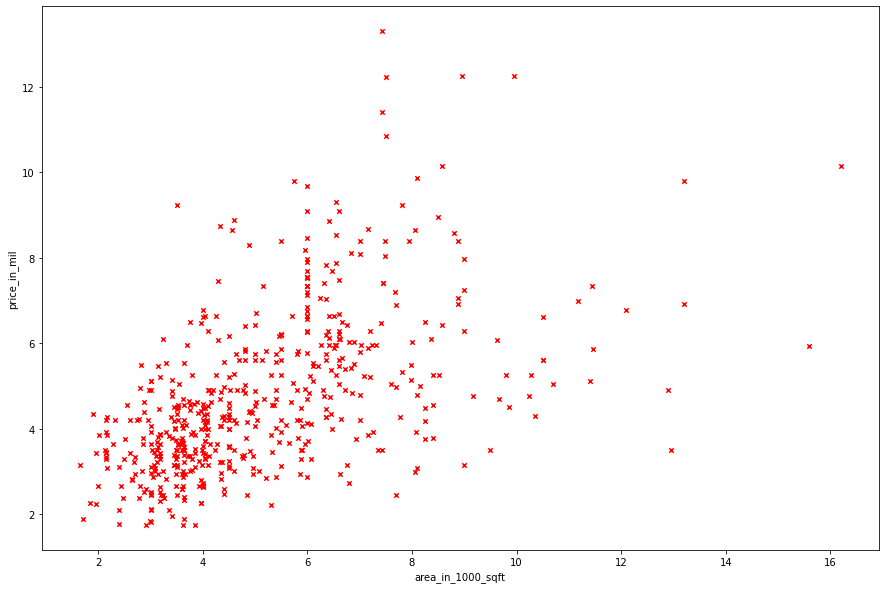

In [5]:
housing_unit_adjusted.plot(kind='scatter', x='area_in_1000_sqft', figsize=(15,10), y='price_in_mil', marker='x', color='r');

In [6]:
x_train = np.array(housing_unit_adjusted.get('area_in_1000_sqft'))
y_train = np.array(housing_unit_adjusted.get('price_in_mil'))

In [7]:
w_init = 0
b_init = 0

In [8]:
def cost_func(x_set, y_set, w, b):
    cost = 0.0
    for i in range(x_set.shape[0]):
        cost_series = w * x_set[i] + b
        cost = cost + ((cost_series - y_set[i])**2)
    return (1/(2*x_set.shape[0]))*cost

In [9]:
def gradient_func(x_set, y_set, w, b):
    dj_dw = 0
    dj_db = 0
    for i in range(x_set.shape[0]):
        pred = w * x_set[i] + b
        dj_dw_resid = (pred - y_set[i])*x_set[i]
        dj_db_resid = pred - y_set[i]
        dj_dw+= dj_dw_resid
        dj_db+= dj_db_resid
    
    dj_dw/=x_set.shape[0]
    dj_db/=x_set.shape[0]
    return dj_dw, dj_db

In [10]:
def gradient_descent(x_set, y_set, w, b, iterations, alpha):
    cost_hist = np.array([])
    for i in range(iterations):
        dj_dw_1, dj_db_1 = gradient_func(x_set, y_set, w, b)
        
        w = w - alpha * dj_dw_1
        b = b - alpha * dj_db_1
        cost_hist = np.append(cost_hist, cost_func(x_set, y_set, w, b))
        
    return w, b, cost_hist 

In [11]:
num_iter = 10000
alpha_1 = 0.01
w_reg, b_reg, cost_array = gradient_descent(x_train, y_train, w_init, b_init, num_iter, alpha_1)
print(w_reg)
print(b_reg)

0.46197505392304555
2.387307518941046


In [12]:
cost_func_df = pd.DataFrame().assign(j_value = cost_array)

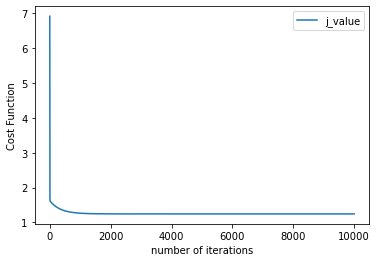

In [13]:
cost_func_df.plot(kind='line', y='j_value', xlabel='number of iterations', ylabel='Cost Function');

In [14]:
pred = w_reg * x_train + b_reg
pred

array([5.81516242, 6.526604  , 6.98857906, 5.85212042, 5.81516242,
       5.85212042, 6.35105348, 9.87130339, 6.12930546, 5.04366408,
       8.48537823, 5.15915784, 5.41324412, 4.00422021, 5.99071294,
       5.15915784, 5.43634287, 6.31409548, 4.51239277, 5.35318737,
       4.38303975, 5.69273903, 6.1062067 , 4.49391376, 6.45268799,
       5.40862437, 5.15915784, 6.48733612, 6.0600092 , 4.92817032,
       5.84057105, 5.6211329 , 4.64174578, 5.14067884, 5.54721689,
       5.6211329 , 5.84380487, 6.545083  , 5.15915784, 5.15915784,
       5.41324412, 5.32546886, 5.38090587, 5.15915784, 5.15915784,
       5.15915784, 5.15915784, 5.43634287, 4.37380025, 5.82440192,
       5.82440192, 5.30929974, 5.15915784, 4.76647905, 5.15915784,
       5.15915784, 7.67230214, 6.545083  , 5.93527593, 5.15915784,
       5.15915784, 6.489646  , 5.27003186, 5.32546886, 7.54987875,
       6.489646  , 8.48537823, 5.94451543, 5.15915784, 7.97258592,
       4.23520773, 5.15915784, 4.70642229, 5.43634287, 4.25368

In [15]:
plotting_df = pd.DataFrame().assign(area_in_1000_sqft = x_train, price_in_mil = y_train, y_pred=pred)
plotting_df

,area_in_1000_sqft,price_in_mil,y_pred
0,7.42,13.30000,5.815162
1,8.96,12.25000,6.526604
2,9.96,12.25000,6.988579
3,7.50,12.21500,5.852120
4,7.42,11.41000,5.815162
...,...,...,...
540,3.00,1.82000,3.773233
541,2.40,1.76715,3.496048
542,3.62,1.75000,4.059657
543,2.91,1.75000,3.731655


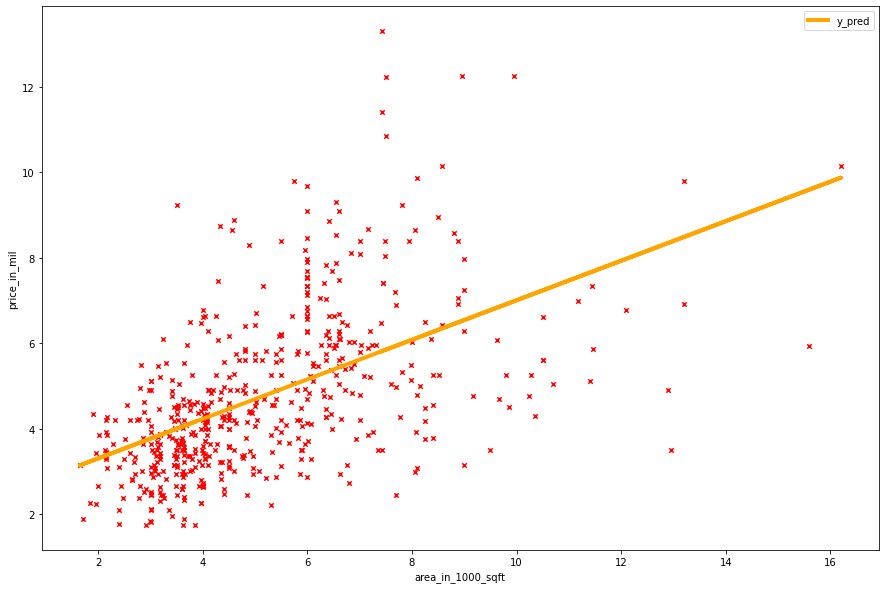

In [16]:
ax = plotting_df.plot(kind='scatter', x='area_in_1000_sqft', y='price_in_mil', marker='x', color='red', figsize=(15,10));
plotting_df.plot(kind='line', x='area_in_1000_sqft', y='y_pred', ax=ax, color='orange', lw=4);